In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

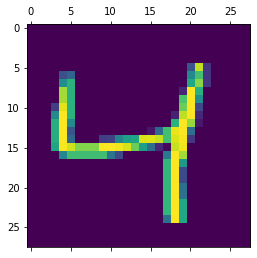

In [3]:
plt.matshow(X_train[2])

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
#flattening the dataset
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

In [6]:
X_train.shape, X_test.shape
X_train = X_train/255
X_test = X_test/255

Let us now create a neural network with two layers, one input and one output <br>
Input layer has 784 neurons, one for each cell, output layer has 10 neurons, 1 for each digit

In [7]:
model = keras.Sequential([
    keras.layers.Dense(
        10, #output neurons
        input_shape = (784,),  #input neurons
        activation="sigmoid") #activation function
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4717 - accuracy: 0.8777
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3034 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2828 - accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9252
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2619 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2580 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2548 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2531 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.250

In [8]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [9]:
y_pred

array([[3.8405696e-03, 1.4172690e-08, 1.9901045e-02, ..., 9.9986362e-01,
        9.9180572e-02, 6.7711151e-01],
       [3.1293735e-01, 6.5026493e-03, 9.9970269e-01, ..., 2.1504773e-15,
        1.2764290e-01, 3.3833229e-12],
       [1.1148202e-04, 9.9399322e-01, 6.4810133e-01, ..., 4.8198499e-02,
        3.4513929e-01, 2.9140528e-02],
       ...,
       [9.1965506e-07, 4.3156032e-07, 1.1918605e-03, ..., 1.9331196e-01,
        6.0876918e-01, 7.3640418e-01],
       [1.2300099e-05, 2.9498777e-05, 2.5527606e-05, ..., 1.9823099e-05,
        6.9535911e-01, 1.8973489e-05],
       [1.1454659e-03, 2.1724596e-11, 3.1112215e-01, ..., 5.3578884e-11,
        3.7399626e-05, 2.2478332e-08]], dtype=float32)

In [10]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.2619 - accuracy: 0.9275


[0.2618517279624939, 0.9275000095367432]

Since all the predictions are for each output neuron, like 1 = 0.12, 2 = 0.32 ... , for each input we are getting an array of 10 different values, the index with the max value is the digit, so we need to construct a new array with direct results instead of different weights, we will do this with np.argmax() which returns the index with max value

In [11]:
y_pred = [np.argmax(i) for i in y_pred]

In [12]:
y_pred[0]

7

In [13]:
Y_test[0]

7

In [14]:
#confusion matrix with tensorflow
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred)

In [15]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    2,    2,    0,    7,   12,    3,    1,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    9,  927,   18,    9,    4,   14,    9,   36,    3],
       [   2,    0,   18,  922,    1,   24,    4,    9,   24,    6],
       [   1,    1,    6,    2,  918,    0,    9,    4,   11,   30],
       [   8,    2,    3,   31,    9,  782,   18,    6,   28,    5],
       [   7,    3,    4,    1,    7,   11,  920,    2,    3,    0],
       [   1,    6,   23,    5,    8,    1,    0,  950,    2,   32],
       [   7,    6,    6,   20,    9,   21,   10,   12,  876,    7],
       [  10,    7,    1,   10,   28,    6,    0,   22,    8,  917]])>

Text(33.0, 0.5, 'Actual')

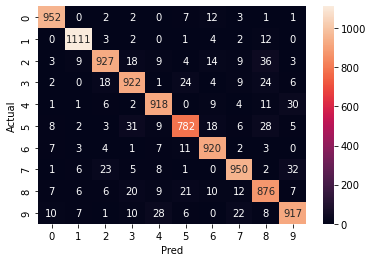

In [16]:
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Pred")
plt.ylabel("Actual")

In [17]:
#Let us now look at adding a hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = "sigmoid"), #layer 1
    keras.layers.Dense(10, activation = "sigmoid") #layer 2
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [18]:
model.fit(X_train, Y_train, epochs=10, callbacks = [tb_callback])

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4239 - accuracy: 0.8914
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2010 - accuracy: 0.9421
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1499 - accuracy: 0.9565
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1191 - accuracy: 0.9663
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0979 - accuracy: 0.9721
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0823 - accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0700 - accuracy: 0.9805
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0606 - accuracy: 0.9834
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0518 - accuracy: 0.9862
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.04

In [19]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9744


[0.08224357664585114, 0.974399983882904]

In [20]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
y_pred = [np.argmax(i) for i in y_pred]

In [22]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred)

In [23]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    1,    1,    3,    0,    1,    1,    0],
       [   0, 1126,    3,    1,    0,    1,    2,    0,    2,    0],
       [   7,    1, 1005,    4,    3,    0,    2,    5,    5,    0],
       [   0,    0,    5,  992,    1,    4,    0,    3,    3,    2],
       [   1,    0,    3,    0,  965,    0,    4,    1,    0,    8],
       [   4,    1,    1,   16,    0,  864,    3,    1,    1,    1],
       [   7,    3,    2,    1,    3,    6,  931,    0,    5,    0],
       [   2,    7,    9,   11,    1,    0,    0,  989,    2,    7],
       [   5,    3,    2,    9,    5,    6,    2,    5,  935,    2],
       [   2,    6,    0,   12,   12,    4,    1,    6,    1,  965]])>

Text(69.0, 0.5, 'Actual')

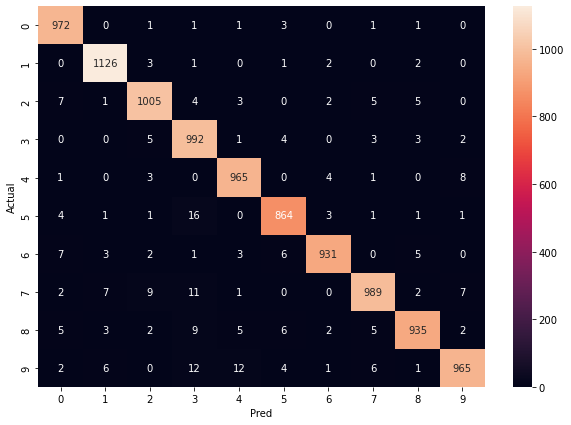

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt = "g")
plt.xlabel("Pred")
plt.ylabel("Actual")

In [25]:
tf.config.experimental.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [26]:
tf.test.gpu_device_name()

''